In [1]:
import os
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import sys
from matplotlib import animation, rc
from IPython.display import HTML, Image

src_dir = os.path.abspath("/home/mmfarrugia/repos/optimization/hybrid_optimizer")
sys.path.append(src_dir)

from hybrid_optimizer import PSO_GA
from plotters import plot_cost_history, plot_contour, plot_surface, plot_summary, Mesher, Designer
import example_funcs

Goldstein-Price's  objective function

    Only takes two dimensions and has a global minimum at
    :code:`f([0,-1])`. Its domain is bounded between :code:`[-2, 2]`

    Best visualized in the domain of :code:`[-1.3,1.3]` and range :code:`[-1,8000]`

In [2]:
import copy
n_dim = 2
lb = [-2., -2.]
ub = [2., 2.]
size_pop = 50
common_start = np.random.uniform(low=lb, high=ub, size=(size_pop, n_dim))

random_config = {
    "n_dim": 2,
    "lb": lb,
    "ub": ub,
    "size_pop": size_pop,
    "vectorize_func": False,
    "taper_GA": True,
    "taper_mutation": True,
    "max_iter": 200,
    "initial_guesses":common_start,
    "guess_deviation":0,
    "guess_ratio":1.0,
    "mutation_strategy": 'DE/rand/1'
}
best_config = copy.deepcopy(random_config)
best_config['mutation_strategy'] = 'DE/best/1'

In [3]:
from plotters import plot_cost_history, plot_contour, plot_surface, Mesher, Designer
#Plot the sphere function's mesh for better plots
m = Mesher(func=example_funcs.goldstein, limits=[(-1.3,1.3), (-1.3,1.3)],  levels=[3., 3.0001, 3.001, 3.01, 3.1, 3.5, 4., 5., 7., 10., 20., 40., 80., 160., 320., 640., 1280.])
#Adjust figure limits
d = Designer(limits=[(-1.3,1.3), (-1.3,1.3), (-1,800)], label=['x-axis', 'y-axis', 'z-axis'])

In [4]:
opts = []
opts.append(PSO_GA(example_funcs.goldstein, n_dim=2, config=random_config))
ho = opts[0]
ho.record_mode = True
ho.run()

print('best_x is ', ho.gbest_x, 'best_y is', ho.gbest_y)

best_x is  [ 0.04852197 -0.98459511] best_y is [3.53506766]


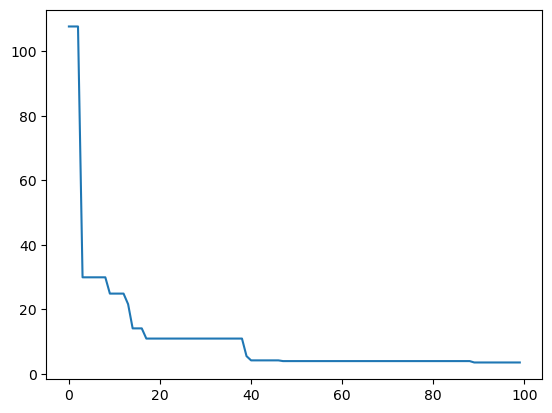

In [5]:
plt.plot(ho.gbest_y_hist)
plt.show()

In [6]:
opts.append(PSO_GA(example_funcs.goldstein, n_dim=2, config=best_config))
ho = opts[1]
ho.record_mode = True
ho.run()

print('best_x is ', ho.gbest_x, 'best_y is', ho.gbest_y)

best_x is  [-0.00187924 -0.99628806] best_y is [3.00828365]


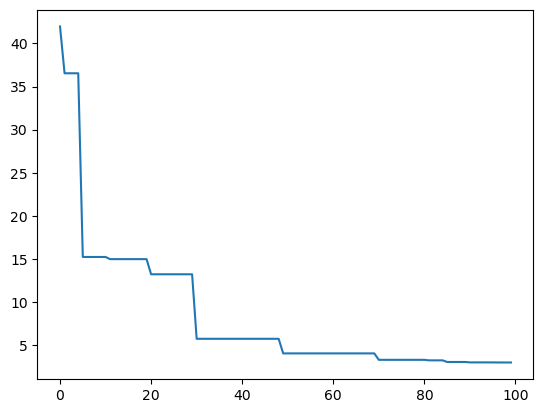

In [7]:
plt.plot(ho.gbest_y_hist)
plt.show()

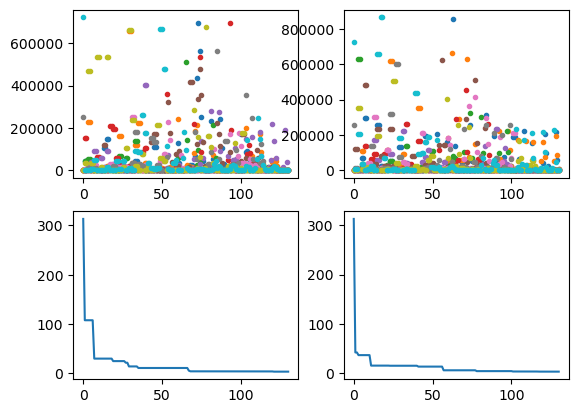

In [8]:
import pandas as pd

Y_history = []
fig, ax = plt.subplots(2, len(opts))
for i, opt in enumerate(opts):
    Y_history = pd.DataFrame(np.array(opt.record_value['Y']).reshape((-1, opt.size_pop)))
    ax[0,i].plot(Y_history.index, Y_history.values, '.')
    Y_history.min(axis=1).cummin().plot(kind='line', ax=ax[1,i])
plt.show()

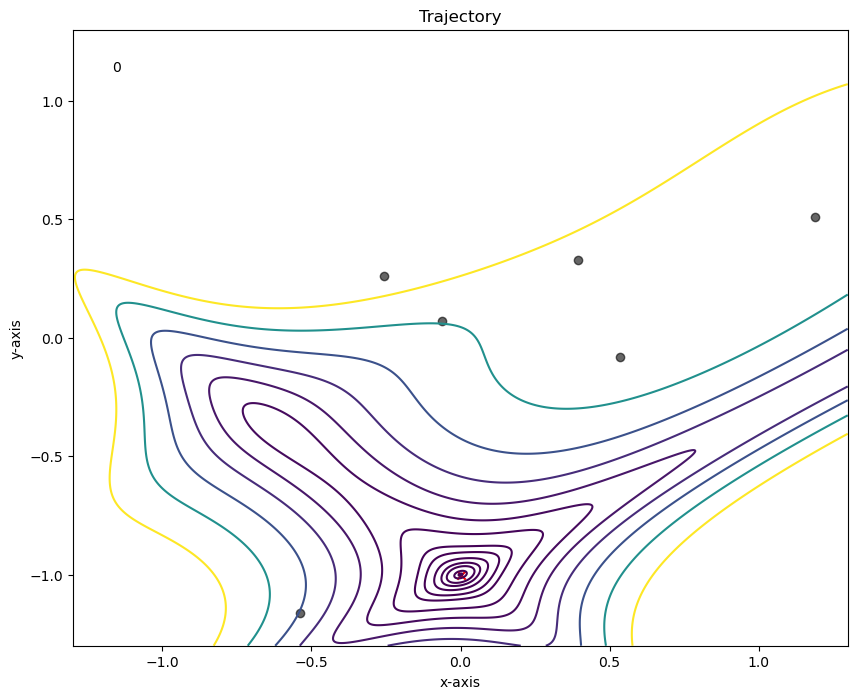

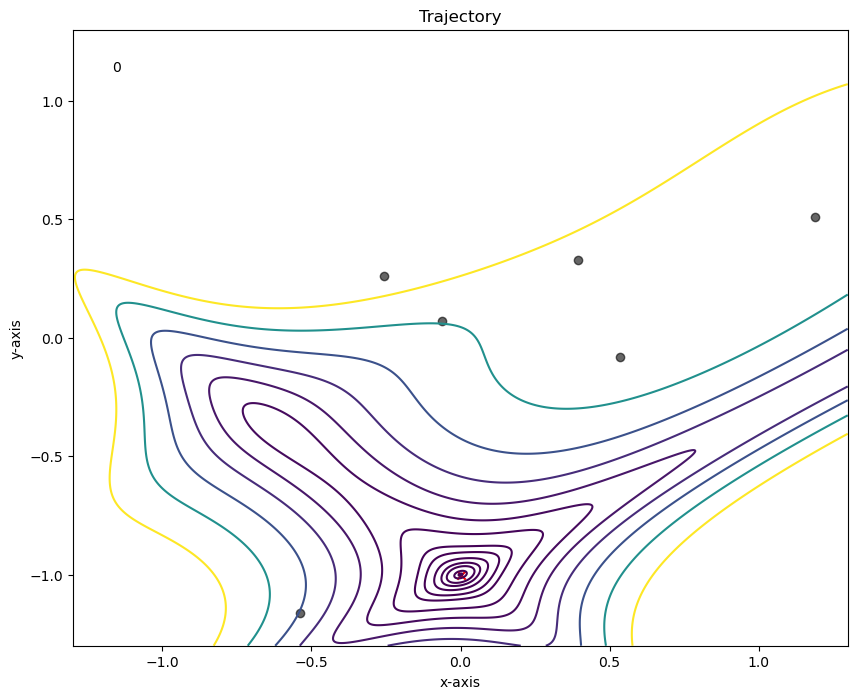

In [9]:
for i, opt in enumerate(opts):
    animation2D = plot_contour(pos_history=ho.record_value['X'], mesher=m, designer=d, mark=(0, -1, 0))
    animation2D.save('goldstein_price_'+str(i)+'.gif', writer='ffmpeg', fps=20)

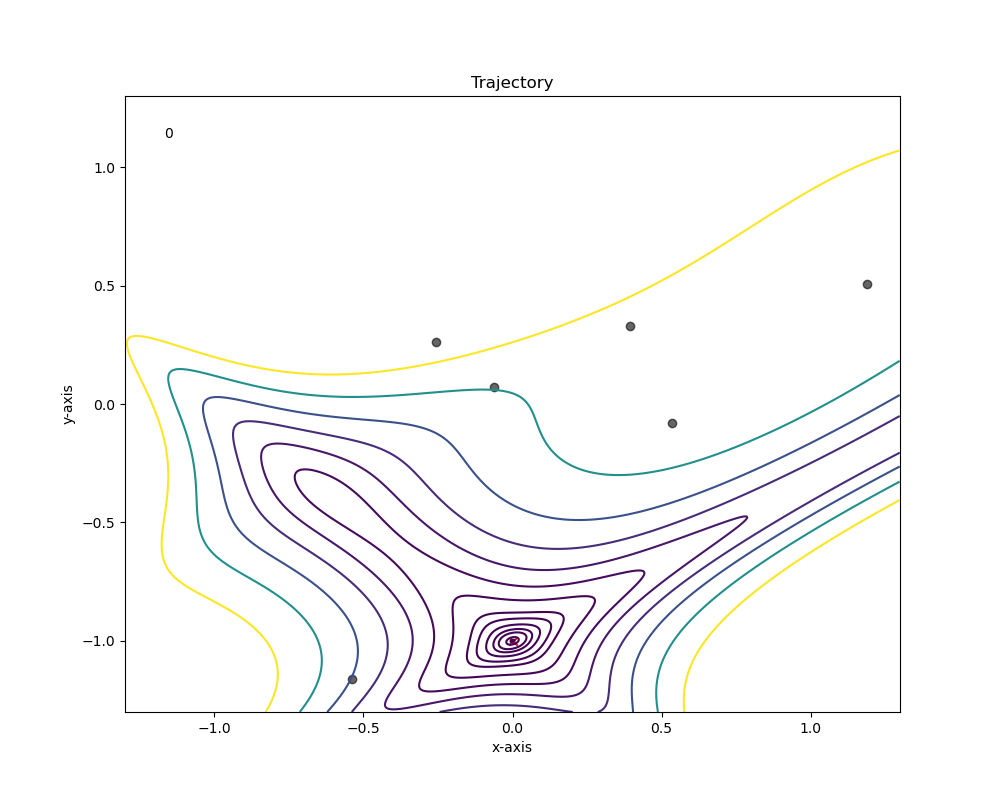

In [10]:
Image('goldstein_price_0.gif')

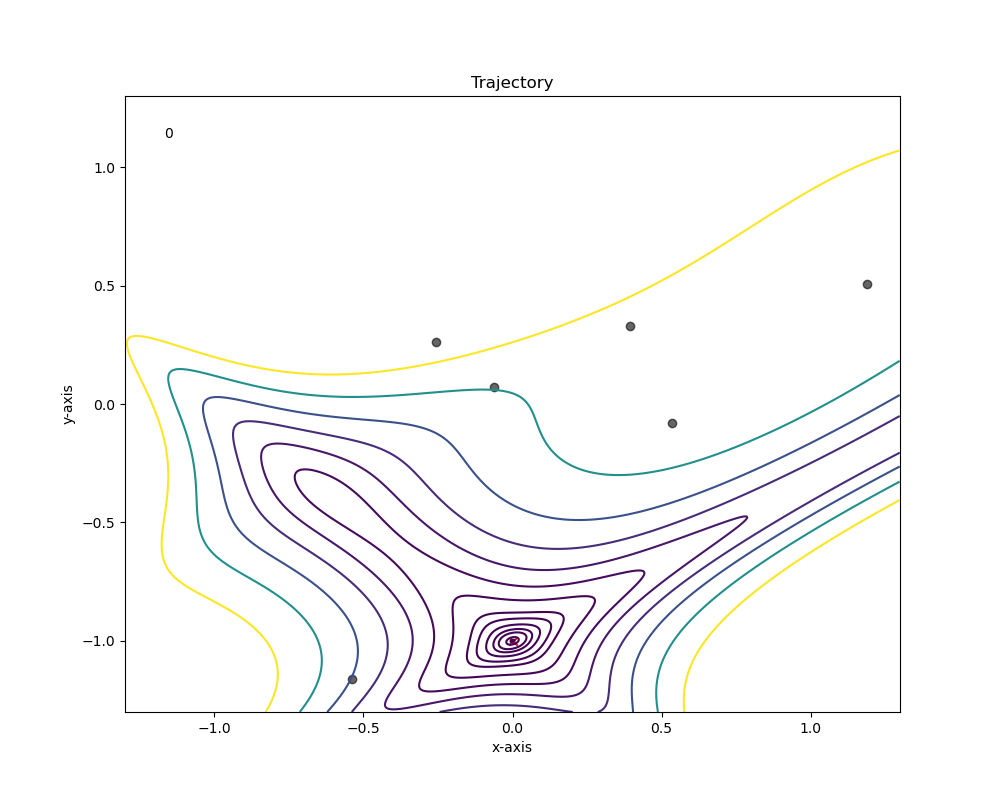

In [11]:
Image('goldstein_price_1.gif')

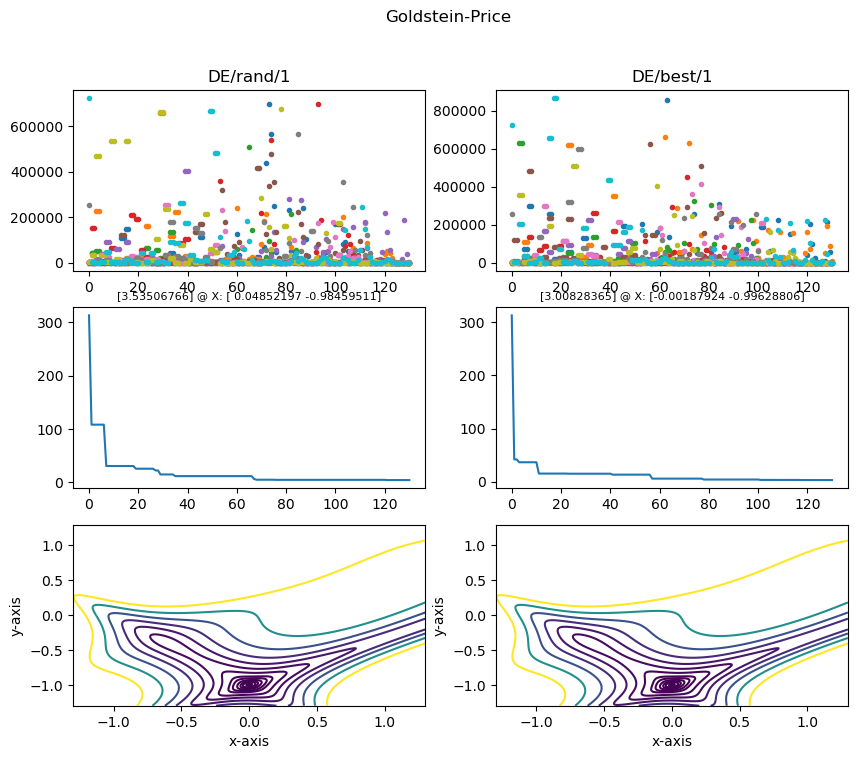

In [12]:
ani_summary = plot_summary(optimizers=opts, title="Goldstein-Price", titles=[opt.mutation_strategy for opt in opts], mesher=m, designer=d)
plt.show()


In [13]:
ani_summary.save('goldstein_summary.gif', writer='ffmpeg', fps=15)
Image(url='goldstein_summary.gif')

In [14]:
%%capture

#Make animation
animation2D = plot_contour(pos_history=ho.record_value['X'], mesher=m, designer=d, mark=(0, -1, 0))

animation2D.save('goldstein_price.gif', writer='ffmpeg', fps=20)

In [15]:
Image(url='goldstein_price.gif')

In [16]:
pos_history_3d = m.compute_history_3d(ho.record_value['X']) #preprocessing

In [17]:
%%capture

animation3d = plot_surface(pos_history=pos_history_3d, mesher=m, designer=d, mark=(0, -1, 0))


In [18]:
animation3d.save('goldstein_3d.gif', writer='ffmpeg', fps=20)


In [19]:
Image(url='goldstein_3d.gif')

Rosenbrock's  objective function

    Also known as the Rosenbrock's valley or Rosenbrock's banana
    function. Has a global minimum of :code:`np.ones(dimensions)` where
    :code:`dimensions` is :code:`x.shape[1]`. The search domain is
    :code:`[-inf, inf]`.


In [20]:
ho = PSO_GA(example_funcs.ps_rosenbrock, transform_func=False, n_dim=2, lb=[-2.048, -2.048], ub = [2.048, 2.048], taper_GA=True, taper_mutation=True, max_iter=500)
ho.record_mode = True
ho.run()
print('best_x is ', ho.gbest_x, 'best_y is', ho.gbest_y)
plt.plot(ho.gbest_y_hist)
plt.show()

TypeError: PSO_GA.__init__() got an unexpected keyword argument 'transform_func'

In [ ]:
import pandas as pd

Y_history = pd.DataFrame(np.array(ho.record_value['Y']).reshape((-1, ho.size_pop)))
fig, ax = plt.subplots(2, 1)
ax[0].plot(Y_history.index, Y_history.values, '.', color='red')
Y_history.min(axis=1).cummin().plot(kind='line')
plt.show()

In [ ]:
from plotters import plot_cost_history, plot_contour, plot_surface, Mesher, Designer
#Plot the sphere function's mesh for better plots
m = Mesher(func=example_funcs.ps_rosenbrock, limits=[(-5,5), (-5,5)])
#Adjust figure limits
d = Designer(limits=[(-5,5), (-5,5), (-1,100)], label=['x-axis', 'y-axis', 'z-axis'])

In [ ]:
%%capture

#Make animation
animation2D = plot_contour(pos_history=ho.record_value['X'], mesher=m, designer=d, mark=(1, 1))

In [ ]:
animation2D.save('rosenbrock.gif', writer='ffmpeg', fps=20)

In [ ]:
Image(url='rosenbrock.gif')

In [ ]:
pos_history_3d = m.compute_history_3d(ho.record_value['X']) #preprocessing

In [ ]:
%%capture

animation3d = plot_surface(pos_history=pos_history_3d, mesher=m, designer=d, mark=(1, 1, 0))


In [ ]:
animation3d.save('rosenbrock_3d.gif', writer='ffmpeg', fps=20)


In [ ]:
Image(url='rosenbrock_3d.gif')

Beale's  objective function

    Only takes two dimensions and has a global minimum of 0 at f([3,0.5]) Its domain is bounded between [-4.5, 4.5]

In [ ]:
ho = PSO_GA(example_funcs.beale, transform_func=False, n_dim=2, lb=[-4.5, -4.5], ub = [4.5, 4.5], taper_GA=True, taper_mutation=True, max_iter=2000)
ho.record_mode = True
ho.run()
print('best_x is ', ho.gbest_x, 'best_y is', ho.gbest_y)
plt.plot(ho.gbest_y_hist)
plt.show()

In [ ]:
import pandas as pd

Y_history = pd.DataFrame(np.array(ho.record_value['Y']).reshape((-1, ho.size_pop)))
fig, ax = plt.subplots(2, 1)
ax[0].plot(Y_history.index, Y_history.values, '.', color='red')
Y_history.min(axis=1).cummin().plot(kind='line')
plt.show()

In [ ]:
from plotters import plot_cost_history, plot_contour, plot_surface, Mesher, Designer
#Plot the sphere function's mesh for better plots
m = Mesher(func=example_funcs.beale, limits=[(-4.5,4.5), (-4.5,4.5)])
#Adjust figure limits
d = Designer(limits=[(-4.5,4.5), (-4.5,4.5), (-0.5,100)], label=['x-axis', 'y-axis', 'z-axis'])

In [ ]:
%%capture

#Make animation
animation2D = plot_contour(pos_history=ho.record_value['X'], mesher=m, designer=d, mark=(3, 0.5, 0))

animation2D.save('beale.gif', writer='ffmpeg', fps=20)

In [ ]:
Image(url='beale.gif')

In [ ]:
pos_history_3d = m.compute_history_3d(ho.record_value['X']) #preprocessing
print(str(pos_history_3d))

In [ ]:
%%capture

animation3d = plot_surface(pos_history=pos_history_3d, mesher=m, designer=d)
plt.show()


In [ ]:
animation3d.save('beale_3d.gif', writer='ffmpeg', fps=15)
Image(url='beale_3d.gif')

Booth's  objective function

    Only takes two dimensions and has a global minimum of `0` at
    :code:`f([1,3])`. Its domain is bounded between :code:`[-10, 10]`

In [ ]:
ho = PSO_GA(example_funcs.booth, transform_func=False, n_dim=2, lb=[-10., -10.], ub = [10., 10.], max_iter=2000)
ho.record_mode = True
ho.run()
print('best_x is ', ho.gbest_x, 'best_y is', ho.gbest_y)
plt.plot(ho.gbest_y_hist)
plt.show()

In [ ]:
import pandas as pd

Y_history = pd.DataFrame(np.array(ho.record_value['Y']).reshape((-1, ho.size_pop)))
fig, ax = plt.subplots(2, 1)
ax[0].plot(Y_history.index, Y_history.values, '.', color='red')
Y_history.min(axis=1).cummin().plot(kind='line')
plt.show()

In [ ]:
from plotters import plot_cost_history, plot_contour, plot_surface, Mesher, Designer
#Plot the sphere function's mesh for better plots
m = Mesher(func=example_funcs.booth, limits=[(-10, 10), (-10, 10)])
#Adjust figure limits
d = Designer(limits=[(-10, 10), (-10, 10), (0,10)], label=['x-axis', 'y-axis', 'z-axis'])

In [ ]:
%%capture

#Make animation
animation2D = plot_contour(pos_history=ho.record_value['X'], mesher=m, designer=d, mark=(1, 3, 0))

animation2D.save('booth.gif', writer='ffmpeg', fps=20)

In [ ]:
pos_history_3d = m.compute_history_3d(ho.record_value['X']) #preprocessing
print(str(pos_history_3d))

In [ ]:
%%capture

animation3d = plot_surface(pos_history=pos_history_3d, mesher=m, designer=d)
plt.show()


In [ ]:
animation3d.save('booth_3d.gif', writer='ffmpeg', fps=15)
Image(url='booth_3d.gif')

Bukin N. 6 Objective Function

    Only takes two dimensions and has a global minimum  of `0` at
    :code:`f([-10,1])`. Its coordinates are bounded by:
        * x[:,0] must be within [-15, -5]
        * x[:,1] must be within [-3, 3]

In [ ]:
ho = PSO_GA(example_funcs.bukin6, transform_func=False, n_dim=2, lb=[-15., -3.], ub = [-5., 3.], max_iter=2000)
ho.record_mode = True
ho.run()
print('best_x is ', ho.gbest_x, 'best_y is', ho.gbest_y)
plt.plot(ho.gbest_y_hist)
plt.show()

In [ ]:
import pandas as pd

Y_history = pd.DataFrame(np.array(ho.record_value['Y']).reshape((-1, ho.size_pop)))
fig, ax = plt.subplots(2, 1)
ax[0].plot(Y_history.index, Y_history.values, '.', color='red')
Y_history.min(axis=1).cummin().plot(kind='line')
plt.show()

In [ ]:

#Plot the sphere function's mesh for better plots
m = Mesher(func=example_funcs.bukin6, limits=[(-15,-5), (-3,3)])
#Adjust figure limits
d = Designer(limits=[(-15,-5), (-3,3), (0,100)], label=['x-axis', 'y-axis', 'z-axis'])

In [ ]:
%%capture

#Make animation
animation2D = plot_contour(pos_history=ho.record_value['X'], mesher=m, designer=d, mark=(-10, 1, 0))

animation2D.save('bukin6.gif', writer='ffmpeg', fps=20)

In [ ]:
Image(url='bukin6.gif')

In [ ]:
%%capture
pos_history_3d = m.compute_history_3d(ho.record_value['X']) #preprocessing
animation3d = plot_surface(pos_history=pos_history_3d, mesher=m, designer=d, mark=(-10, 1, 0))
plt.show()

In [ ]:
animation3d.save('bukin6_3d.gif', writer='ffmpeg', fps=20)
Image(url='bukin6_3d.gif')

Rastrigin's  objective function

    Has a global minimum at :code:`f(0,0,...,0)` with a search
    domain of :code:`[-5.12, 5.12]`

In [ ]:
ho = PSO_GA(example_funcs.rastrigin, transform_func=False, n_dim=2, lb=[-5.12, -5.12], ub = [5.12, 5.12], max_iter=500)
ho.record_mode = True
ho.run()
print('best_x is ', ho.gbest_x, 'best_y is', ho.gbest_y)
plt.plot(ho.gbest_y_hist)
plt.show()

In [ ]:
import pandas as pd

Y_history = pd.DataFrame(np.array(ho.record_value['Y']).reshape((-1, ho.size_pop)))
fig, ax = plt.subplots(2, 1)
ax[0].plot(Y_history.index, Y_history.values, '.', color='red')
Y_history.min(axis=1).cummin().plot(kind='line')
plt.show()

In [ ]:
from plotters import plot_cost_history, plot_contour, plot_surface, Mesher, Designer
#Plot the sphere function's mesh for better plots
m = Mesher(func=example_funcs.rastrigin, limits=[(-5.12,5.12), (-5.12,5.12)])
#Adjust figure limits
d = Designer(limits=[(-5.12,5.12), (-5.12,5.12), (0,10)], label=['x-axis', 'y-axis', 'z-axis'])

In [ ]:
%%capture

#Make animation
animation2D = plot_contour(pos_history=ho.record_value['X'], mesher=m, designer=d, mark=(0, 0, 0))

animation2D.save('rastrigin.gif', writer='ffmpeg', fps=20)

In [ ]:
Image(url='rastrigin.gif')

In [ ]:
pos_history_3d = m.compute_history_3d(ho.record_value['X']) #preprocessing
print(str(pos_history_3d))

In [ ]:
%%capture

animation3d = plot_surface(pos_history=pos_history_3d, mesher=m, designer=d)
plt.show()


In [ ]:
animation3d.save('rastrigin_3d.gif', writer='ffmpeg', fps=15)
Image(url='rastrigin_3d.gif')